In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [90]:
df = yf.download('^GSPC')

[*********************100%***********************]  1 of 1 completed


In [91]:
aa = df[['Close']].pct_change().rolling(30).std() * np.sqrt(252)

In [92]:
bb = df[['Close']].pct_change().dropna()

bb

,Close
Date,
1950-01-04,0.011405
1950-01-05,0.004748
1950-01-06,0.002953
1950-01-09,0.005889
1950-01-10,-0.002927
...,...
2023-03-16,0.017562
2023-03-17,-0.011019
2023-03-20,0.008918


array([[<AxesSubplot:title={'center':'Close'}>]], dtype=object)

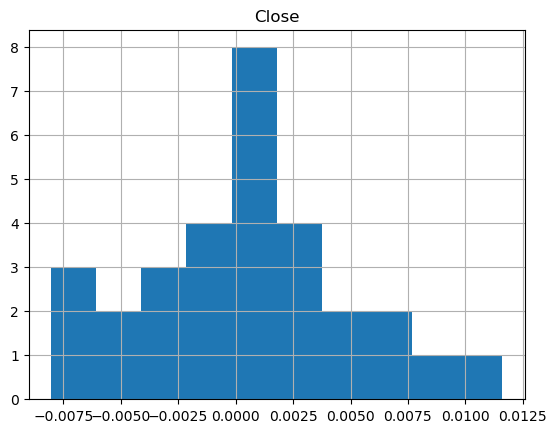

In [97]:
bb.iloc[30:60].skew()

In [54]:
import scipy.stats as stats

skew_df_30 = bb.rolling(30).apply(stats.skew, raw=False)
skew_df_60 = bb.rolling(60).apply(stats.skew, raw=False)
skew_df_90 = bb.rolling(90).apply(stats.skew, raw=False)

skew_data = pd.concat([skew_df_30, skew_df_60, skew_df_90], axis=1)

In [55]:
skew_data.dropna(inplace=True)

In [57]:
skew_data.columns = ['30', '60', '90']

In [58]:
skew_data['30-60'] = skew_data['30'] - skew_data['60']
skew_data['60-90'] = skew_data['60'] - skew_data['90']

In [60]:
test = skew_data.loc['2016':]

<AxesSubplot:xlabel='Date'>

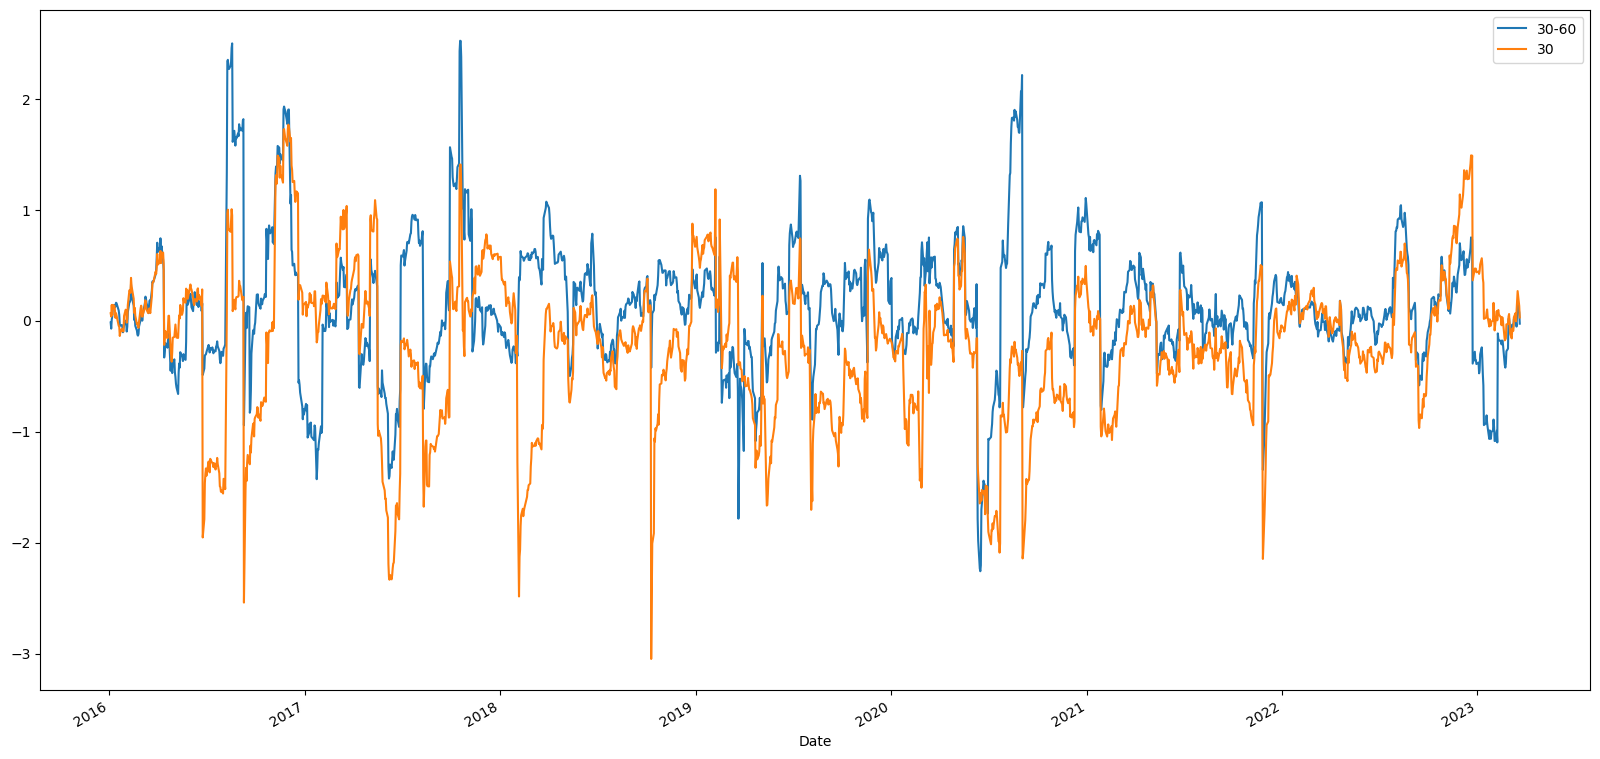

In [66]:
test[[test.columns[-2], test.columns[0]]].plot(figsize=(20,10))

In [85]:
mean_test = pd.DataFrame()
mean_test['mu'] = skew_data['90'].rolling(30).mean().copy()
mean_test['30'] = skew_data['30']
mean_test = mean_test.dropna()

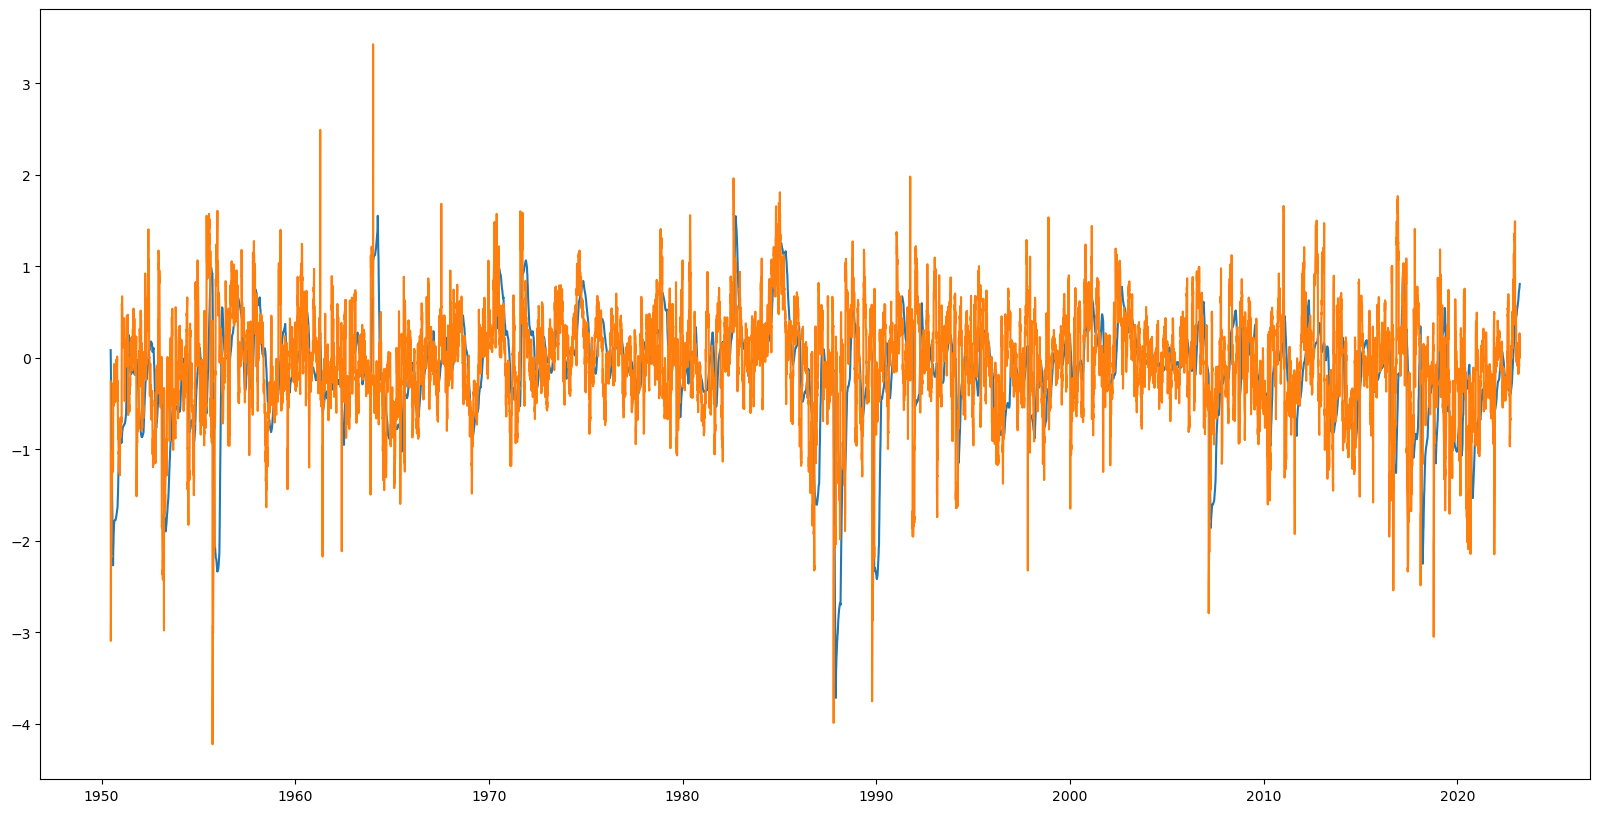

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(mean_test.mu)
plt.plot(mean_test['30'])

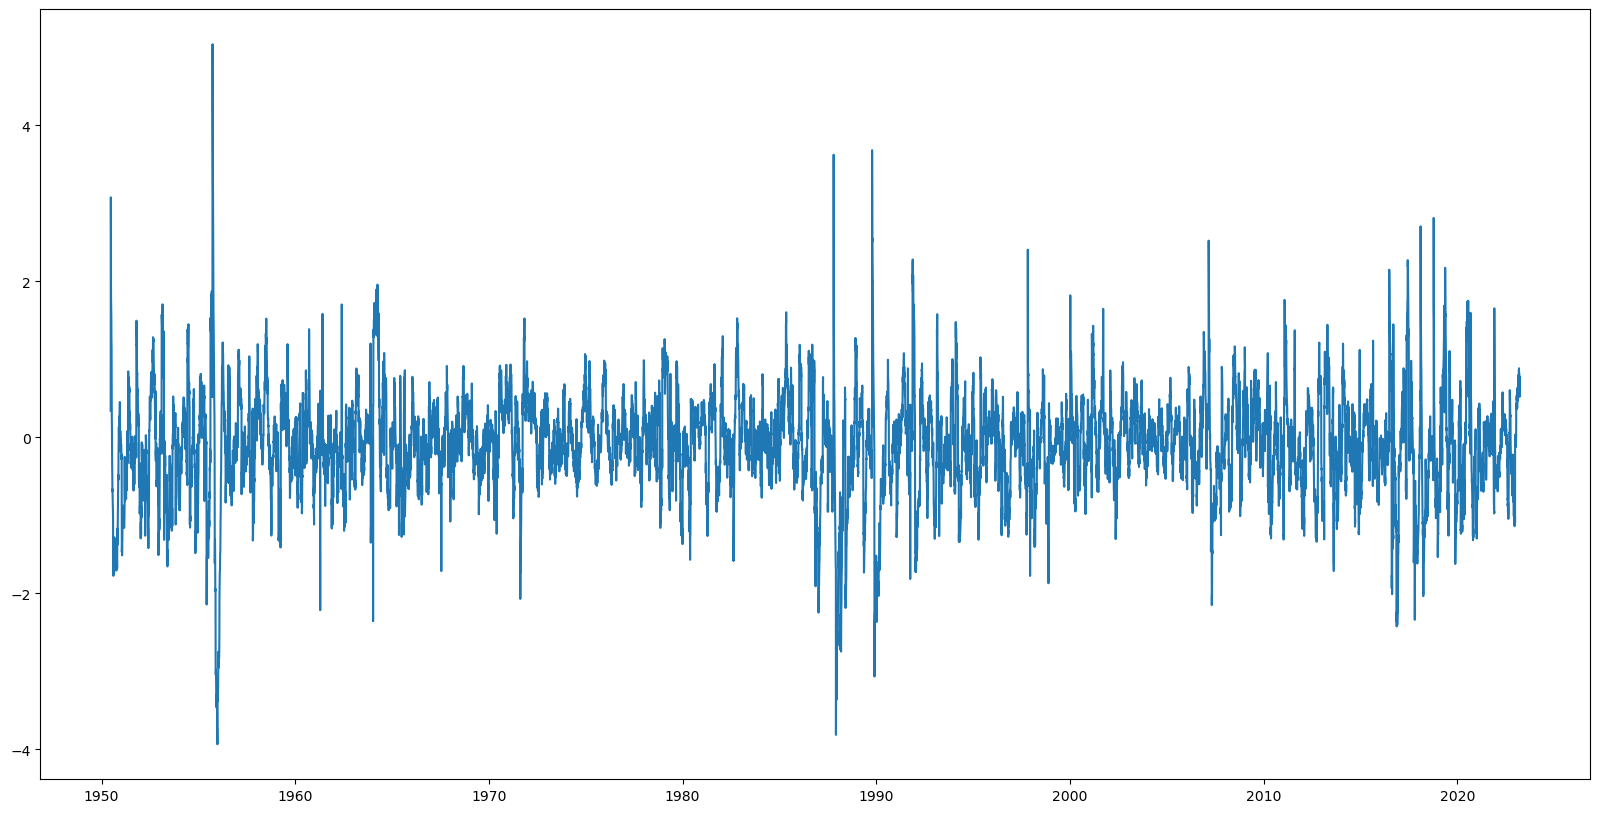

In [88]:
plt.figure(figsize=(20,10))
plt.plot(mean_test.mu - mean_test['30'])